In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
!pip install panel

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from panel.interact import interact
from panel import widgets
import panel as pn
pn.extension()

%matplotlib inline

import ipywidgets as widgets
from ipywidgets import Box

# To load the environment variable defined in the .env file
from dotenv import load_dotenv
load_dotenv();

In [54]:
import src.data.NHLDataManager as DataManager

In [9]:
seasons_year = [2016, 2017]

data_manager_regular = DataManager.NHLDataManager()
nhl_data_regular = data_manager_regular.download_data(seasons_year=seasons_year, is_regular=True)

data_manager_playoffs = DataManager.NHLDataManager()
nhl_data_playoffs = data_manager_playoffs.download_data(seasons_year=seasons_year, is_regular=False)

This is your NHL_DATA_DIR environment: /mnt/d/GitHub/IFT6758-A2022-G08/data/raw


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1230 [00:00<?, ?it/s]

  0%|          | 0/1271 [00:00<?, ?it/s]

This is your NHL_DATA_DIR environment: /mnt/d/GitHub/IFT6758-A2022-G08/data/raw


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

In [27]:
nhl_data = {}
nhl_data['Regular'] = nhl_data_regular
nhl_data['Playoffs'] = nhl_data_playoffs

In [55]:
print(nhl_data['Playoffs'][2016].__len__())
print(nhl_data['Playoffs'][2017].__len__())

102
105


In [48]:
def get_data(season_year, game_type, game_number):
    return nhl_data[game_type][season_year][game_number]

In [49]:
season_year = pn.widgets.RadioButtonGroup(
    name='Season Year', 
    options=seasons_year,
    button_type='danger')

game_type = pn.widgets.RadioButtonGroup(
    name='Game Type', 
    options=['Regular', 'Playoffs'], 
    button_type='success')

game_number = pn.widgets.EditableIntSlider(
        name="Game Number",
        value=1,
        start=1,
        end=len(nhl_data[game_type.value][season_year.value]))

@pn.depends(season_year.param.value, game_type.param.value, watch=True)
def _update_game_number(season_year, game_type):
    game_number.value = 1
    game_number.start = 1
    game_number.end = len(nhl_data[game_type][season_year])



In [51]:
interact(get_data, season_year=season_year, game_type=game_type, game_number=game_number)

Traceback (most recent call last):
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/pyviz_comms/__init__.py", line 346, in _handle_msg
 self._on_msg(msg)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/panel/viewable.py", line 294, in _on_msg
 doc.unhold()
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/bokeh/document/document.py", line 799, in unhold
 self.callbacks.unhold()
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/bokeh/document/callbacks.py", line 396, in unhold
 self.trigger_on_change(event)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/bokeh/document/callbacks.py", line 373, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/bokeh/document/callbacks.py", line 408, in invoke_with_curdoc
 return f()
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/bokeh/util/callback_manager.py", line 191, in invoke
 callback(attr, old, new)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/panel/reactive.py", line 405, in _comm_change
 state._handle_exception(e)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/panel/io/state.py", line 391, in _handle_exception
 raise exception
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/panel/reactive.py", line 403, in _comm_change
 self._schedule_change(doc, comm)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/panel/reactive.py", line 385, in _schedule_change
 self._change_event(doc)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/panel/reactive.py", line 381, in _change_event
 self._process_events(events)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/panel/reactive.py", line 319, in _process_events
 self.param.update(**self_events)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/param/parameterized.py", line 1898, in update
 self_._batch_call_watchers()
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/param/parameterized.py", line 2059, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/param/parameterized.py", line 2021, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/panel/widgets/slider.py", line 851, in _sync_value
 self.param.update(**{event.name: event.new})
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/param/parameterized.py", line 1898, in update
 self_._batch_call_watchers()
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/param/parameterized.py", line 2059, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/param/parameterized.py", line 2021, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/panel/interact.py", line 138, in update_pane
 new_object = self.object(**self.kwargs)
 File "/tmp/ipykernel_3343/2583047669.py", line 2, in get_data
 return nhl_data[game_type][season_year][game_number]
IndexError: list index out of range
 


 Traceback (most recent call last):
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/pyviz_comms/__init__.py", line 346, in _handle_msg
 self._on_msg(msg)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/panel/viewable.py", line 294, in _on_msg
 doc.unhold()
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/bokeh/document/document.py", line 799, in unhold
 self.callbacks.unhold()
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/bokeh/document/callbacks.py", line 396, in unhold
 self.trigger_on_change(event)
 File "/home/fidaa/anaconda3/envs/NHL/lib/python3.9/site-packages/bokeh/document/callbacks.py", line 373, in trigger_on_change
 invoke_

Column
    [0] Column
        [0] RadioButtonGroup(button_type='danger', name='Season Year', options=[2016, 2017], value=2016)
        [1] RadioButtonGroup(button_type='success', name='Game Type', options=['Regular', 'Playoffs'], value='Regular')
        [2] EditableIntSlider(end=1230, name='Game Number', start=1, value=1, width=300)
    [1] Row
        [0] JSON(dict, name='interactive00237')

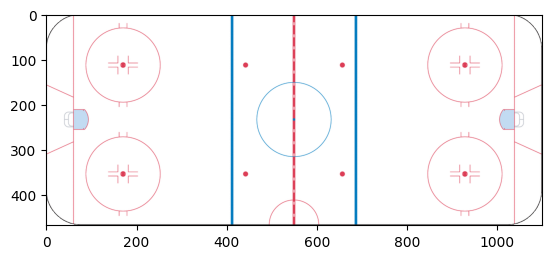

In [52]:
rink_img = mpimg.imread('figures/nhl_rink.png')
imgplot = plt.imshow(rink_img)